In [9]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import pandas as pd

%matplotlib inline

In [79]:
data_dir = '../data/'

data = Table.read(data_dir+'neugent12_supergiants.fits').to_pandas()
data['Col'] = data['Col'].str.strip().str.decode('utf-8')
data['_2MASS'] = data['_2MASS'].str.strip().str.decode('utf-8')
bright = data['logL'] > 3.5
red = data['Col'] == 'R'
yellow = data['Col'] == 'Y'

sgs = data[bright]
rsgs = data[bright & red]
ysgs = data[bright & yellow]

rsg_coords = Table.read(data_dir+'rsg_coords.fits').to_pandas()
ysg_coords = Table.read(data_dir+'ysg_coords.fits').to_pandas()

rsg_coords['_2MASS'] = rsg_coords['_2MASS'].str.strip().str.decode('utf-8')
rsg_coords.drop(columns=['_RAJ2000','_DEJ2000'],inplace=True)
ysg_coords['_2MASS'] = ysg_coords['_2MASS'].str.strip().str.decode('utf-8')


rsgs = pd.merge(rsgs,rsg_coords,on='_2MASS')
ysgs = pd.merge(ysgs,ysg_coords,on='_2MASS')

ysgs

,_2MASS,Cat,logTe,logL,Col,RAJ2000,DEJ2000
0,J05055551-6753108,1,3.854,5.716,Y,76.481292,-67.886333
1,J05322496-6741536,1,3.702,5.600,Y,83.104000,-67.698250
2,J04551106-6710104,1,3.884,5.491,Y,73.796125,-67.169556
3,J04543683-6920221,1,3.650,5.478,Y,73.653500,-69.339472
4,J05401217-6940049,1,3.692,5.437,Y,85.050750,-69.668056
5,J05342246-6701235,1,3.891,5.433,Y,83.593583,-67.023222
6,J05051222-6644126,1,3.946,5.398,Y,76.300958,-66.736833
7,J04553248-6957450,1,3.784,5.381,Y,73.885333,-69.962528
8,J05380957-6906213,1,3.793,5.352,Y,84.539875,-69.105944
9,J05361007-6855411,1,3.791,5.335,Y,84.042000,-68.928083


,_2MASS,Cat,logTe,logL,Col


In [46]:
data

,_2MASS,Cat,logTe,logL,Col
0,J05055551-6753108,1,3.854,5.716,Y
1,J05322496-6741536,1,3.702,5.600,Y
2,J05294221-6857173,1,3.589,5.533,R
3,J04551106-6710104,1,3.884,5.491,Y
4,J04543683-6920221,1,3.650,5.478,Y
5,J05401217-6940049,1,3.692,5.437,Y
6,J05342246-6701235,1,3.891,5.433,Y
7,J05051222-6644126,1,3.946,5.398,Y
8,J04553248-6957450,1,3.784,5.381,Y
9,J05380957-6906213,1,3.793,5.352,Y


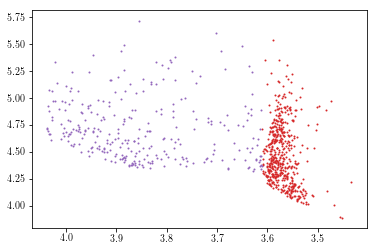

In [39]:
plt.scatter(rsgs['logTe'],rsgs['logL'],c='C3',s=1)
plt.scatter(ysgs['logTe'],ysgs['logL'],c='C4',s=1)

plt.gca().invert_xaxis()